In [1]:
from numpy.random import default_rng
import skimage.exposure
import numpy as np
import cv2

In [2]:
def random_quadrillage_generator_train(indice=1, width=500, height=500, sigmaX=10, sigmaY=10, thresh=200, blur=11, path='/content/quadrillage'):
  # define random seed to change the pattern
  rng = default_rng()
  # create random noise image
  noise = rng.integers(0, 255, (height,width), np.uint8, True)

  # blur the noise image to control the size
  blur = cv2.GaussianBlur(noise, (blur,blur), sigmaX, sigmaY, borderType = cv2.BORDER_DEFAULT)

  # stretch the blurred image to full dynamic range
  stretch = skimage.exposure.rescale_intensity(blur, in_range='image', out_range=(0,255)).astype(np.uint8)

  # threshold stretched image to control the size
  thresh = cv2.threshold(stretch, thresh, 255, cv2.THRESH_BINARY)[1]
  # apply morphology open and close to smooth out shapes
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
  result = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
  result = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel)
  horizantal = np.random.randint(4, 15)
  verticale = np.random.randint(4, 15)
  result_noise = np.zeros(result.shape, np.uint8)
  result_noise += result
  for i in range (1, horizantal + 1):
    fact = np.random.randint(50, 100)
    ponte = np.random.randint(10, 20)
    #fact = 50
    h = 99 + i*ponte + fact
    cv2.line(result, (100,h), (400,h), (255,0,0), 2)
    cv2.line(result_noise, (100,h), (400,h), (0,0,0), 2)
  for i in range(1, verticale + 1):
    fact = np.random.randint(50, 100)
    ponte = np.random.randint(10, 20)
    v = 119 + i*ponte + fact
    cv2.line(result, (v,100), (v,400), (255,0,0), 2)
    cv2.line(result_noise, (v,100), (v,400), (0,0,0), 2)
  guess = np.random.randint(0, 1)
  if guess == 0:
    # Rotation
    rot = np.random.randint(-15, 15)
    (h, w) = result.shape[:2]
    center = (w / 2, h / 2)
    angle = rot
    scale = 1

    M = cv2.getRotationMatrix2D(center, angle, scale)
    result= cv2.warpAffine(result, M, (w, h))
    result_noise = cv2.warpAffine(result_noise, M, (w, h))
   # save result
  '''
  cv2.imwrite('quadrillage_dataset/input_train/'f'{indice}_{indice}.jpg', result)
  cv2.imwrite('quadrillage_dataset/target_train/'f'{indice}_{indice}.jpg', result_blank)
  '''
  print('Done 'f'{indice}')
  return result, result_noise

In [3]:
target_train = np.zeros((1, 300, 300))
input_train = np.zeros((1, 300, 300))
target_test = np.zeros((1, 300, 300))
input_test = np.zeros((1, 300, 300))

In [4]:
list_input = []
list_target = []

In [ ]:
for j in range(5):
  target_train = np.zeros((1, 300, 300))
  input_train = np.zeros((1, 300, 300))
  for i in range(20):
    width = np.random.randint(200, 800)
    height = np.random.randint(200, 800)
    sigmaX = np.random.randint(10, 15)
    sigmaY = np.random.randint(10, 15)
    thresh = np.random.randint(180, 210)
    while True:
      blur = np.random.randint(11,15)
      if not blur%2 == 0:
        break
    result, result_noise = random_quadrillage_generator_train(i, width=width, height=height, sigmaX=sigmaX, sigmaY=sigmaY, thresh=thresh, blur=blur)
    result_noise = cv2.resize(result_noise, (300, 300))
    result = cv2.resize(result, (300, 300))
    if i == 0:
        target_train[i] += result_noise
        input_train[i] += result
    else:
      result_noise = result_noise.reshape((1, 300, 300))
      result = result.reshape((1, 300, 300))
      target_train = np.append(target_train, result_noise, axis=0)
      input_train = np.append(input_train, result, axis=0)
  list_input.append(input_train)
  list_target.append(target_train)
  #target_train.shape, input_train.shape
  print(len(list_input)), print(len(list_target)), print(j)

In [ ]:
for i in range(100):
  width = np.random.randint(200, 800)
  height = np.random.randint(200, 800)
  sigmaX = np.random.randint(10, 15)
  sigmaY = np.random.randint(10, 15)
  thresh = np.random.randint(180, 210)
  while True:
    blur = np.random.randint(11,15)
    if not blur%2 == 0:
      break
  result, result_noise = random_quadrillage_generator_train(i, width=width, height=height, sigmaX=sigmaX, sigmaY=sigmaY, thresh=thresh, blur=blur)
  result_noise = cv2.resize(result_noise, (300, 300))
  result = cv2.resize(result, (300, 300))
  if i == 0:
      target_test[i] += result_noise
      input_test[i] += result
  else:
    result_noise = result_noise.reshape((1, 300, 300))
    result = result.reshape((1, 300, 300))
    target_test = np.append(target_test, result_noise, axis=0)
    input_test = np.append(input_test, result, axis=0)
target_test.shape, input_test.shape

In [12]:
for i in range(5):
  if i == 0:
    input_train = np.array(list_input[i])
    target_train = np.array(list_target[i])
  else:
    a1 = np.array(list_input[i])
    a2 = np.array(list_target[i])
    input_train = np.append(input_train, a1, axis=0)
    target_train = np.append(target_train, a2, axis=0)
#input_train.shape, target_train.shape

((100, 300, 300), (100, 300, 300))

In [10]:
import matplotlib.pyplot as plt 

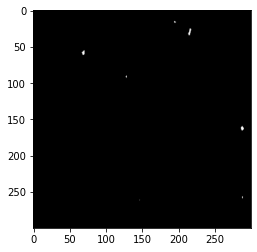

In [11]:
plt.imshow(target_train[2], cmap='Greys_r')

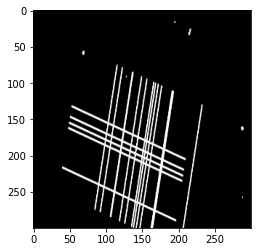

In [12]:
 plt.imshow(input_train[2], cmap='Greys_r')

In [ ]:
with open('input_train.npy', 'wb') as f:
  np.save(f, input_train)
with open('input_test.npy', 'wb') as f:
  np.save(f, input_test)
with open('target_train.npy', 'wb') as f:
  np.save(f, target_train)
with open('target_test.npy', 'wb') as f:
  np.save(f, target_test)